<a href="https://colab.research.google.com/github/hsiaom26/DS4CS/blob/master/gpu_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Please try to copy this notebook to your own google drive.
# You can leverage Google's cloud-based machine to execute the following codes.
# Google provides several runtimes.

# "Runtime" -> "Change runtime type"
# Make sure you use "Python 3" because 2.x will not be maintained.
# You may select "GPU" from the Hardware Accelerator drop-down.

# The following codes demonstrate the time difference between using CPU and GPU.

# https://www.tensorflow.org/guide/gpu

In [2]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [3]:
print(tf.config.list_physical_devices())
print( tf.config.experimental.list_logical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


"/CPU:0": The CPU of your machine.

"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

If a TensorFlow operation has both CPU and GPU implementations, by default the GPU devices will be given priority when the operation is assigned to a device.

### CPU vs GPU

In [4]:
# A simple function for performance testing

import time

def performanceTest(device_name, size):
    # by using 'with' tf.device, we can explictly assign the computation task to
    # a device, i.e., CPU or GPU
    with tf.device(device_name):
        W = tf.random.normal([size, size], name = 'W')
        X = tf.random.normal([size, size], name = 'X')
        mul = tf.matmul(W, X, name = 'mul') # <--- matmul() has both CPU and GPU ver.
        sum_result = tf.reduce_sum(mul, name = 'sum')
    
    # time.time() returns the current time
    startTime = time.time()

    # To find out which devices your operations are assigned to,
    # put tf.debugging.set_log_device_placement(True) at the begining.
    # Enabling device placement logging to be printed.
    tfconfig = tf.debugging.set_log_device_placement(True) 
    
    sum_result # execution

    # record end time
    takeTimes = time.time() - startTime

    print(device_name, "size=", size, "Time:", takeTimes)
    return takeTimes

In [5]:
gpu_li = []
cpu_li = []
x_li = []

# iteratively execute performanceTest() with different size of parameter
for x in range(0, 4001, 500): 
    g = performanceTest("/GPU:0", x) #  <---- check device name
    c = performanceTest("/CPU:0", x) # <---- check device name
    x_li.append(x)
    gpu_li.append(g)
    cpu_li.append(c)

/GPU:0 size= 0 Time: 2.7418136596679688e-05
/CPU:0 size= 0 Time: 6.67572021484375e-06
/GPU:0 size= 500 Time: 5.245208740234375e-06
/CPU:0 size= 500 Time: 7.62939453125e-06
/GPU:0 size= 1000 Time: 5.0067901611328125e-06
/CPU:0 size= 1000 Time: 8.106231689453125e-06
/GPU:0 size= 1500 Time: 4.76837158203125e-06
/CPU:0 size= 1500 Time: 1.2874603271484375e-05
/GPU:0 size= 2000 Time: 6.67572021484375e-06
/CPU:0 size= 2000 Time: 1.3828277587890625e-05
/GPU:0 size= 2500 Time: 7.152557373046875e-06
/CPU:0 size= 2500 Time: 1.5497207641601562e-05
/GPU:0 size= 3000 Time: 7.3909759521484375e-06
/CPU:0 size= 3000 Time: 1.33514404296875e-05
/GPU:0 size= 3500 Time: 8.344650268554688e-06
/CPU:0 size= 3500 Time: 1.5974044799804688e-05
/GPU:0 size= 4000 Time: 8.344650268554688e-06
/CPU:0 size= 4000 Time: 1.4781951904296875e-05


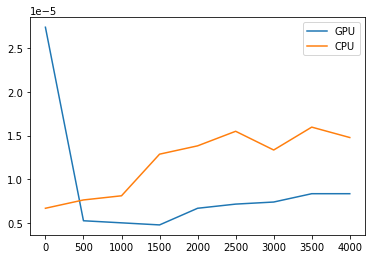

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_li, gpu_li, label = 'GPU')
plt.plot(x_li, cpu_li, label = 'CPU')
plt.legend()